In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

#计算每帧对应的时间
def FrameTimeC(frameNum, frameLen, inc, fs):
    ll = np.array([i for i in range(frameNum)])
    return ((ll - 1) * inc + frameLen / 2) / fs

#分帧函数
def enframe(x, win, inc=None):
    nx = len(x)
    if isinstance(win, list) or isinstance(win, np.ndarray):
        nwin = len(win)
        nlen = nwin  # 帧长=窗长
    elif isinstance(win, int):
        nwin = 1
        nlen = win  # 设置为帧长
    if inc is None:
        inc = nlen
    nf = (nx - nlen + inc) // inc
    frameout = np.zeros((nf, nlen))
    indf = np.multiply(inc, np.array([i for i in range(nf)]))
    for i in range(nf):
        frameout[i, :] = x[indf[i]:indf[i] + nlen]
    if isinstance(win, list) or isinstance(win, np.ndarray):
        frameout = np.multiply(frameout, np.array(win))
    return frameout

#加窗
def hanning_window(N):
    nn = [i for i in range(N)]
    return 0.5 * (1 - np.cos(np.multiply(nn, 2 * np.pi) / (N - 1)))

#短时傅里叶变换
def STFFT(x, win, nfft, inc):
    xn = enframe(x, win, inc)
    xn = xn.T
    y = np.fft.fft(xn, nfft, axis=0)
    return y[:nfft // 2, :]


/tmp/ipykernel_23556/3468223954.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs1, data = wavfile.read(path)#sr=None声音保持原采样频率， mono=False声音保持原通道数
/tmp/ipykernel_23556/3468223954.py:3: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  fs1, data = wavfile.read(path)#sr=None声音保持原采样频率， mono=False声音保持原通道数


13.0


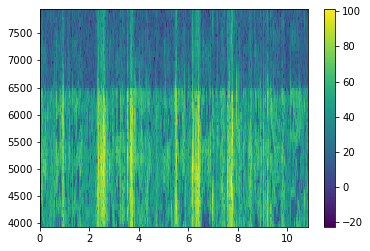

In [12]:
path=r"/home/toughman/WorkSpace/VAD/frequency/4_01.wav"#audio002.wav
# data, fs = librosa.load(path, sr=None, mono=False)#sr=None声音保持原采样频率， mono=False声音保持原通道数
fs1, data = wavfile.read(path)#sr=None声音保持原采样频率， mono=False声音保持原通道数
value =  open("value.txt", "w")

wlen = 256
nfft = wlen
win = hanning_window(wlen)
inc = 128

y = STFFT(data, win, nfft, inc)

FrequencyScale = [i * fs / wlen for i in range(wlen // 2)] #频率刻度
frameTime = FrameTimeC(y.shape[1], wlen, inc, fs) #每帧对应的时间
LogarithmicSpectrogramData=10*np.log10((np.abs(y)*np.abs(y))) #取对数后的数据

HalfSpectrogram = LogarithmicSpectrogramData[63:,]
sum = float('-inf')
last_sum = float('-inf')
for i in range(LogarithmicSpectrogramData.shape[1]):
  if i < 70 or i > 125:
    continue
  temp_spec = np.abs(LogarithmicSpectrogramData[i])
  sum = np.sum(temp_spec)
  if last_sum == float('-inf'):
    last_sum = sum
    continue
  if abs(sum-last_sum) > 10000:
    print(i/8)
  value.write(str(i/8) + "\t" + str(sum) + "\t" +str(sum-last_sum) + "\n")
  last_sum = sum
#np.savetxt("SpectrogramData.txt",LogarithmicSpectrogramData)
value.close()
# plt.pcolormesh(frameTime, FrequencyScale,LogarithmicSpectrogramData)
plt.pcolormesh(frameTime, FrequencyScale[63:],HalfSpectrogram)
plt.colorbar()
#plt.savefig('语谱图22.png')
plt.show()
